### K-Means & K-Medoids

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scratch_libraries.kmeans import KMeans
from scratch_libraries.kmedoids import KMedoids
from sklearn.cluster import KMeans as KMeansSklearn

from sklearn import datasets
from sklearn.metrics import silhouette_score

In [2]:
proc_data, y_true = datasets.make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=88 # For reproducibility
)

k_s = 4 # number of clusters

In [3]:
mean = np.mean(proc_data,  axis=0)
std = np.std(proc_data,  axis=0)
proc_data = (proc_data - mean) / std

In [4]:
# K-Means with Sklearn
kmeans_obj_1 = KMeansSklearn(n_clusters=k_s, random_state=42)
kmeans_obj_1.fit(proc_data)
y_pred = kmeans_obj_1.predict(proc_data)
print(f"Silhouette Coefficient K-Means:\t{silhouette_score(proc_data,y_pred)}")

Silhouette Coefficient K-Means:	0.539950315942242


In [5]:
# K-Means from scratch
kmeans_obj_2 = KMeans(n_clusters=k_s, random_state=42)
kmeans_obj_2.fit(proc_data)
y_pred = kmeans_obj_2.predict(proc_data)
print(f"Silhouette Coefficient K-Means:\t{silhouette_score(proc_data,y_pred)}")

Silhouette Coefficient K-Means:	0.539950315942242


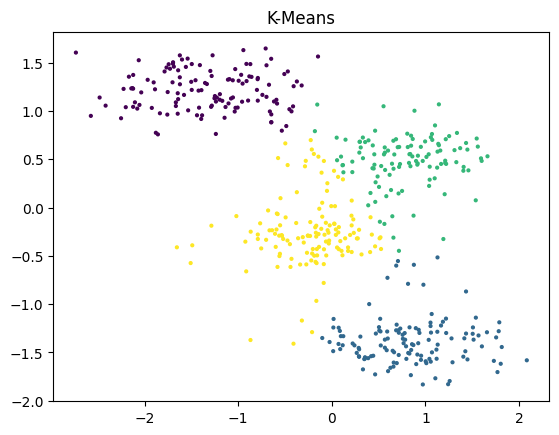

In [6]:
plt.scatter(proc_data[:, 0], proc_data[:, 1], c=y_pred, s=4)
plt.title("K-Means")
plt.show()

---

In [7]:
# K-Medoids from scratch
kmedoids_obj = KMedoids(n_clusters=k_s, random_state=46)
kmedoids_obj.fit(proc_data)
y_pred = kmedoids_obj.predict(proc_data)
print(f"Silhouette Coefficient K-Medoids:\t{silhouette_score(proc_data,y_pred)}")

Silhouette Coefficient K-Medoids:	0.5406869030640193


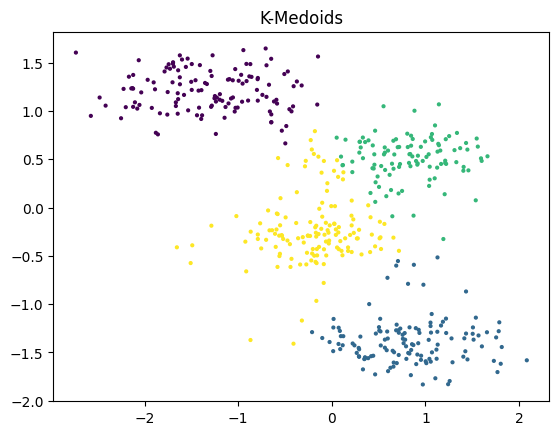

In [8]:
plt.scatter(proc_data[:, 0], proc_data[:, 1], c=y_pred, s=4)
plt.title("K-Medoids")
plt.show()